In [87]:

# Necessary imports for the assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

# Homework 1
### By Andrei Stefan 

## Exercise 1: CLT
In order to reproduce the results for the assignment, we define the generator for $Z$ as the sum of $n$ random Bernoulli variables. The results have been plotted below and match the ones on the slide.

In [88]:

class ZBernoulli:
    def __init__(self,n,p):
        self.n=n
        self.p=p
        
    def get(self):
        return (np.sum(np.random.binomial(size=n,p=self.p, n=1)) - n*p)/np.sqrt(n*p*(1-p))
    
class ZUniform:
    def __init__(self,n):
        self.n=n
        
    def get(self):
        return (np.sum(np.random.uniform(0,1, size=n))-self.n/2)/np.sqrt(n/12)
        

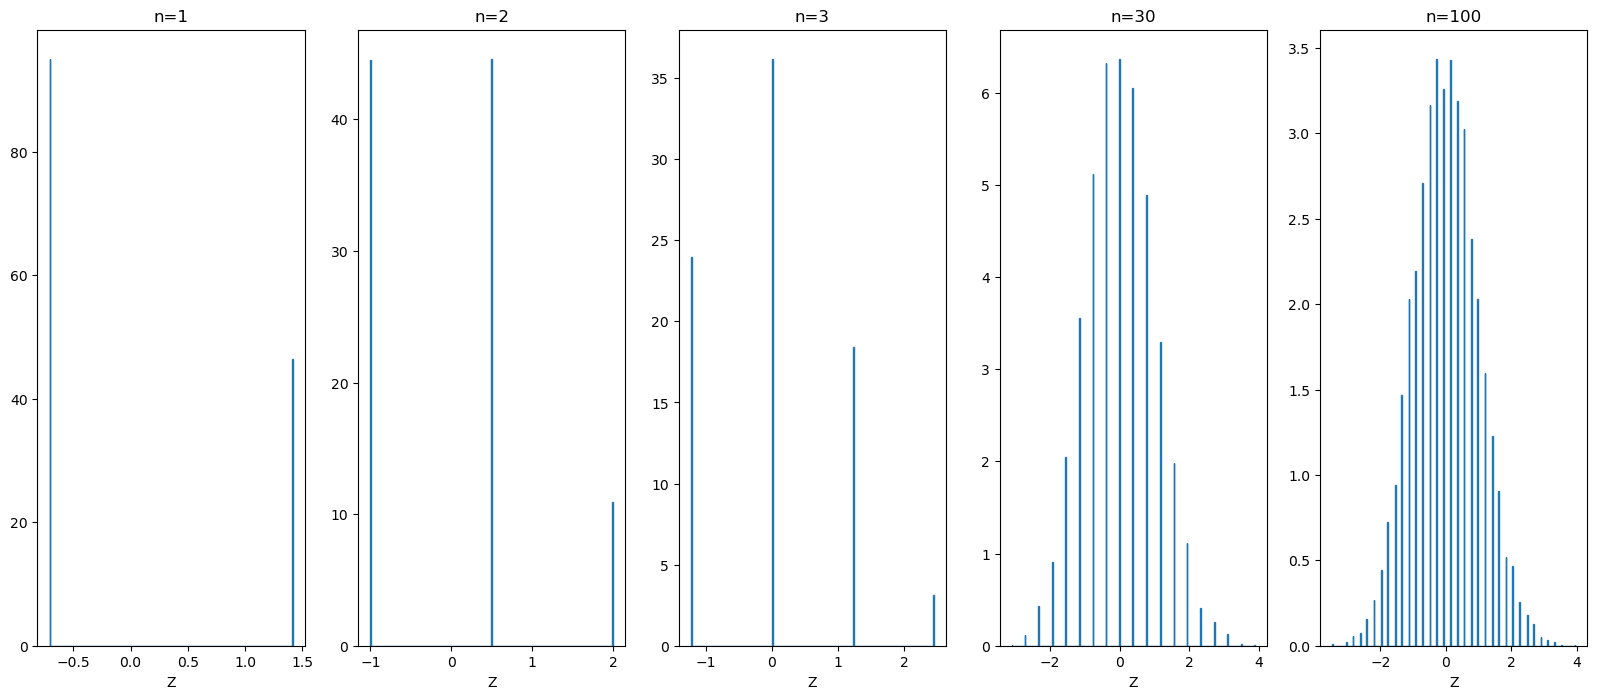

In [89]:
arr = [1,2,3,30,100]
m = 10000
p = 1/3
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZBernoulli(n,p)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    axs[ix].hist(zs, bins=300, density=True, histtype='step')
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')
    
#print(vals)    
plt.show()

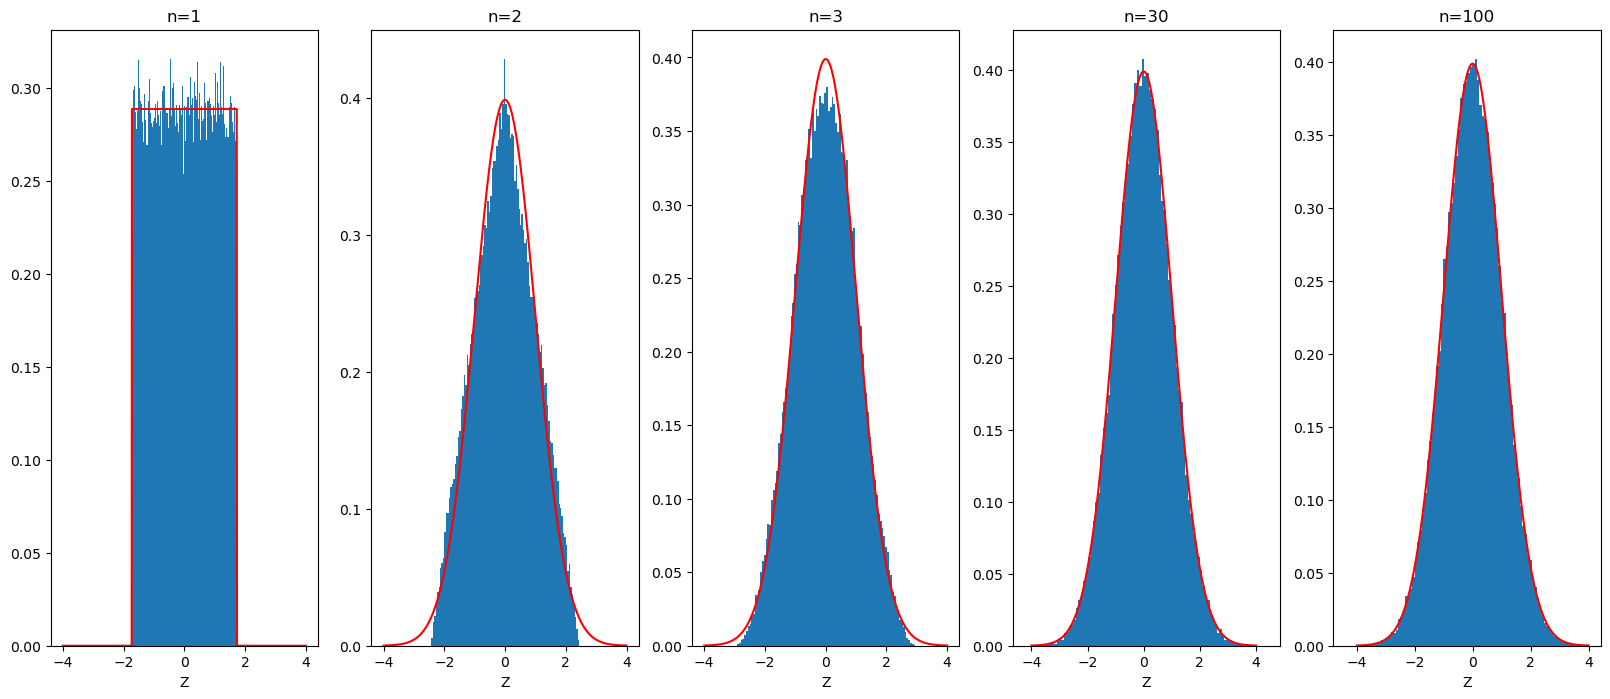

In [90]:
arr = [1,2,3,30,100]
m = 100000
vals = []
fig, axs = plt.subplots(1,len(arr), figsize=(20, 8))
for ix, n in enumerate(arr):
    z = ZUniform(n)
    zs = []
    for i in range(m):
        zs.append(z.get())
    #print(arr)
    
    zs.sort()
    vals.append(zs)
    
    x = np.linspace(-4, 4, 1000)
    pdf = stats.norm.pdf(x, 0,1)
    u_pdf = stats.uniform.pdf(x, -np.sqrt(3), 2*np.sqrt(3))
    if n==1:
        axs[ix].plot(x, u_pdf, 'r')
    else:
        axs[ix].plot(x, pdf, 'r')
    axs[ix].hist(zs, bins=100, density=True)
    
    axs[ix].set_title(f'n={n}')
    axs[ix].set_xlabel('Z')

## Exercise 2

### Subtask a)

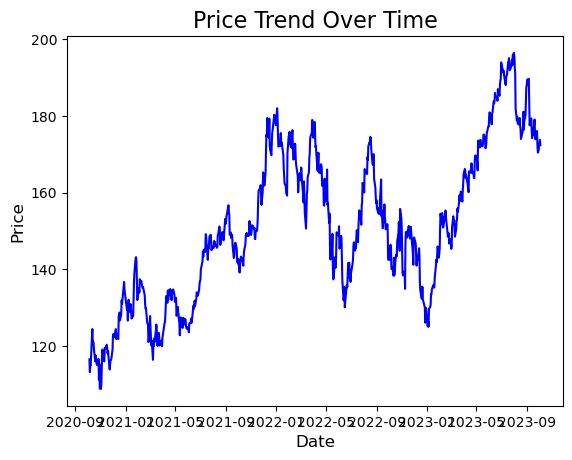

In [91]:
daily_data = pd.read_csv("data/DailyData - STOCK_US_XNAS_AAPL.csv")
#print(daily_data)
daily_data['Date'] = pd.to_datetime(daily_data['Date'])
daily_data.set_index('Date', inplace=True)
plt.title('Price Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(daily_data.index, daily_data.Close, linestyle='-', color='b', label='Price')
plt.show()


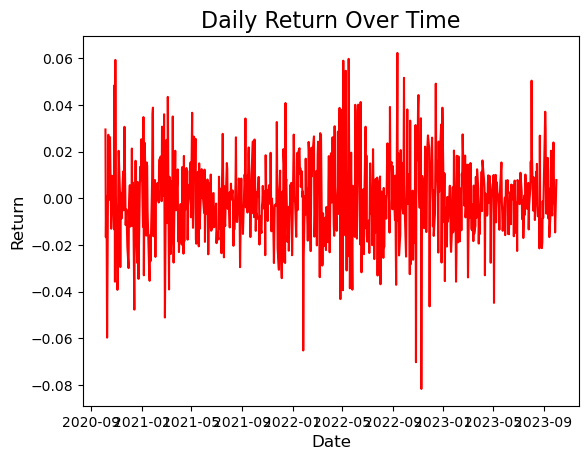

In [92]:
# plot daily return
daily_data['Return'] = daily_data['Close'].pct_change()
plt.title('Daily Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.plot(daily_data.index, daily_data.Return, linestyle='-', color='r', label='Return')
plt.show()

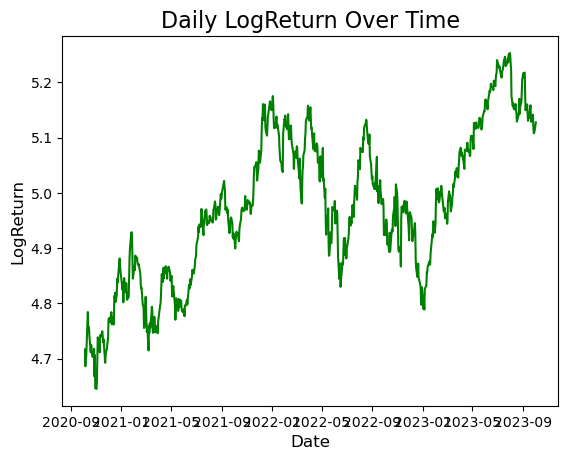

In [93]:
# plot daily logreturn
daily_data['LogReturn'] = np.log(daily_data['Close'] - np.log(daily_data['Close'].shift(1)))
plt.title('Daily LogReturn Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('LogReturn', fontsize=12)
plt.plot(daily_data.index, daily_data.LogReturn, linestyle='-', color='g', label='LogReturn')
plt.show()

The daily return and daily log return can be assumed to be equal when the returns are small, for which we can approximate $$\ln(\frac{S_{x}}{S_x-1}) \approx \frac{S_{x}-S{x-1}}{S_{x-1}}$$

### Subtask b)

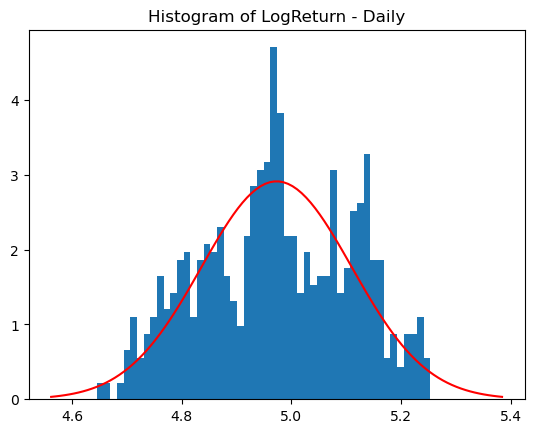

Mean of LogReturn:  4.972848746750936
Variance of LogReturn:  0.018785953436489842


In [94]:
mean = daily_data.LogReturn.mean()
variance = daily_data.LogReturn.var()
stddev = np.sqrt(variance)


plt.hist(daily_data.LogReturn, bins=50, density = True)
plt.title("Histogram of LogReturn - Daily")
x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()



print("Mean of LogReturn: ", mean)
print("Variance of LogReturn: ", variance)


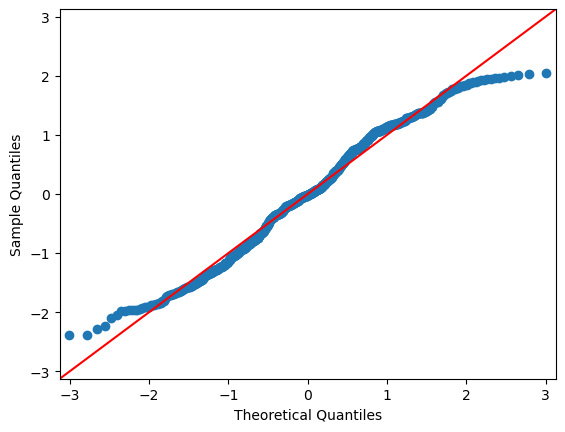

In [95]:
foo = daily_data['LogReturn']
foo = foo.dropna()
#print(foo)
fig = sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

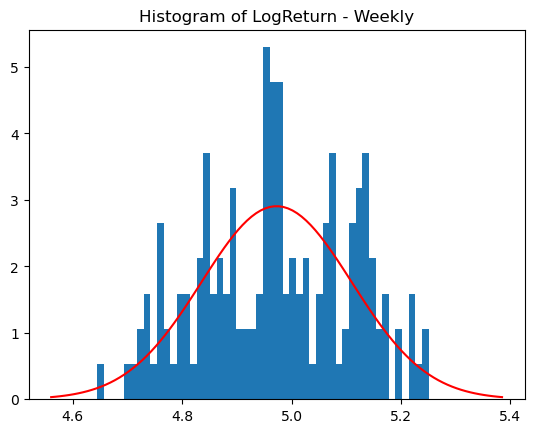

In [96]:
weekly_data = pd.read_csv("data/WeeklyData - STOCK_US_XNAS_AAPL.csv")
# print(daily_data)
weekly_data['Date'] = pd.to_datetime(weekly_data['Date'])
weekly_data.set_index('Date', inplace=True)
weekly_data['LogReturn'] = np.log(weekly_data['Close'] - np.log(weekly_data['Close'].shift(1)))


plt.hist(weekly_data.LogReturn, bins=50, density = True)
plt.title("Histogram of LogReturn - Weekly")

mean = weekly_data.LogReturn.mean()
variance = weekly_data.LogReturn.var()
stddev = np.sqrt(variance)

x = np.linspace(mean - 3 * stddev, mean + 3 * stddev, 100)
plt.plot(x, 1 / (stddev * np.sqrt(2 * np.pi)) * np.exp(- (x - mean) ** 2 / (2 * stddev ** 2)), color='r')
plt.show()


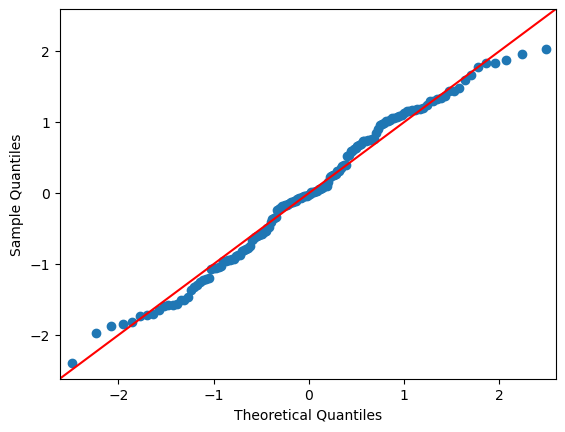

In [97]:
foo = weekly_data['LogReturn']
foo = foo.dropna()
#print(foo)
sm.qqplot(foo, stats.norm, fit=True, line='45')
plt.show()

The daily data in this case seems to follow the normal distribution more closely than the weekly data. This could be because the daily data has more data points and thus the Central Limit Theorem applies more closely. The weekly data has less data points and thus the distribution is not as close to the normal distribution. 

### Subtask c)

From the equation (6.9) from the book and the calculation above we can deduce the correlation between logreturns and drift and volatility as follows:
$$\log(\frac{S_{t+1}}{S_t}) = (\mu - \frac{\sigma^2}{2})(t_{i+1} +t_i )+ \sigma \sqrt{(t_{i+1} +t_i )} Z_i$$
, which follows a normal distribution $N((\mu - \frac{\sigma^2}{2})(t_{i+1} +t_i), \sigma^2(t_{i+1} +t_i))$.

Since we have already calculated the mean and variance at the previous subpoint, it is now easy to calculate the annualized drift and volatility. ($ \mu = (\hat\mu + \frac{\hat{\sigma}^2}{2}) * n $ and $\sigma = \hat\sigma * \sqrt{n} $, where n is the number of trading periods per year)

In [98]:
def drift_volatility(mean, variance, n):
    mu = (mean + variance/2) * n
    sigma = np.sqrt(variance * n)
    return mu, sigma

annual_drift_d, annual_volatility_d = drift_volatility(daily_data.LogReturn.mean(), daily_data.LogReturn.var(), 252)
annual_drift_w, annual_volatility_w = drift_volatility(weekly_data.LogReturn.mean(), weekly_data.LogReturn.var(), 52)

print("Annualized drift and volatility for daily data: ", annual_drift_d, annual_volatility_d)
print("Annualized drift and volatility for weekly data: ", annual_drift_w, annual_volatility_w)

Annualized drift and volatility for daily data:  1255.5249143142335 2.175789573004577
Annualized drift and volatility for weekly data:  259.07371722821244 0.9901484574759772


## Exercise 3
### Subtask a)

In [99]:
def step(S_ti, mu, sigma, T, L):
    """
    Uses the discrete price model to calculate $$S_{t+1}$$
    :param S_ti: The price at time ti
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L: Time steps
    :return: S_{t+1}
    """
    dt = T/L
    return S_ti * (1 + mu * dt + sigma * np.sqrt(dt) * np.random.normal(0,1))

In [100]:
def simulate(S0, mu, sigma, T, L_arr, M=1, sum_squares = False, plot = False, hist = False):
    """
    Simulates the price of a stock using the discrete time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param L: Time steps
    :param M: Number of simulations
    :param sum_squares: Whether to store the running sum of square increments
    :param plot: Whether to plot the price evolution of the stock
    :param hist: Whether to plot the histogram of the final prices
    """
    if plot and hist:
        raise ValueError("Cannot plot both the price evolution and the histogram")
    
    S_Ts = []
    S_s = []
    for L in L_arr:
        S_T = []
        for x in range (M):
                S = [S0]
                for i in range(L):
                    S.append(step(S[-1], mu, sigma, T, L))
                S_T.append(S[-1])
                S_s.append(S)        
                if plot:
                    plt.plot(S, color = 'gray', linewidth=0.5)
        if hist:
            plt.hist(S_T, bins=100)
            plt.title(f'L={L}, M={M}')
            # vertical line at S0
            plt.axvline(x=S0, color='r', linestyle='--')
            plt.show()
        S_Ts.append(S_T)  

    if plot:
        # make all plot lines the same color
        plt.title(f'$ \\Delta $t ={T}, $ \\delta $t={T/L}')
        plt.show()
    #print(S_Ts)
    #print(S_s)
    if sum_squares:
        S_np = np.array(S_s)
        diff  = np.diff(S_np, axis=1)**2
        diff = diff[:, :-1]
        SSIs = diff
        return S_Ts, SSIs
    return S_Ts

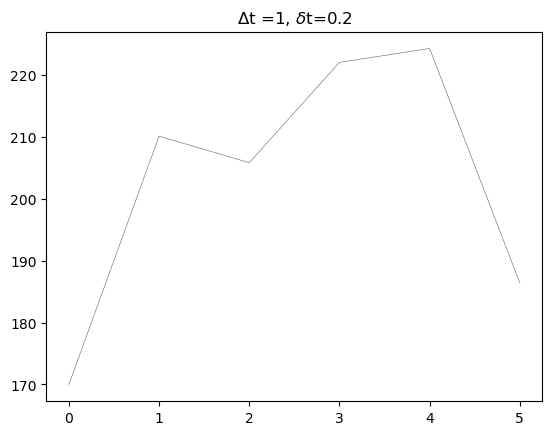

[[186.41735169176704]]

In [101]:
T = 1
S0 = 170
sigma = 0.344
mu = 0.1

L = [5]

M = 5000

simulate(S0, mu, sigma, T, L,M=1, plot=True, hist=False)

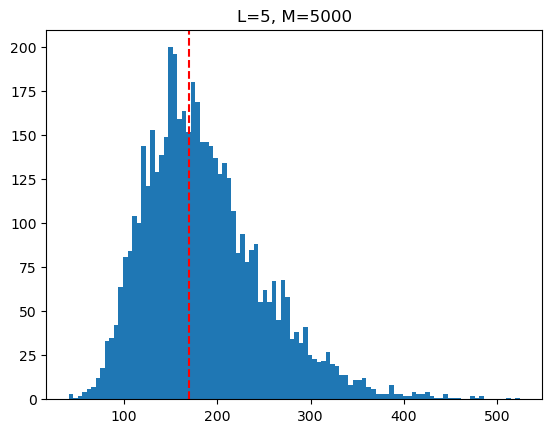

[[136.38499079695666,
  235.6418599716499,
  129.56426364274554,
  197.5898524159305,
  215.64652203428426,
  233.87099878624753,
  76.81894777818988,
  207.38874525973725,
  180.88042274705472,
  97.98184469873387,
  122.25829042843796,
  212.56730773066664,
  247.1319783472741,
  203.23920500453744,
  151.71577323702238,
  159.11658809111807,
  276.8619031698908,
  157.18161392777452,
  295.0791412446921,
  225.77177513331893,
  166.17467354467482,
  222.7819408342382,
  127.817709872637,
  156.66571244562857,
  307.5390529279171,
  186.41977851992155,
  146.01793786713014,
  289.2958049217163,
  162.36319760045367,
  178.90085435224418,
  269.353143237133,
  173.35253382093626,
  213.6618101942327,
  126.5677993237088,
  168.2427690676332,
  150.59718536271833,
  281.0167302094971,
  208.6297906568293,
  186.60630187706042,
  102.70068034225021,
  354.5549777595149,
  140.8588234590203,
  272.6013684238799,
  165.858675142004,
  137.17013363619307,
  144.30792249763394,
  221.289115

In [102]:
simulate(S0, mu, sigma, T, L,M=5000, plot=False, hist=True)

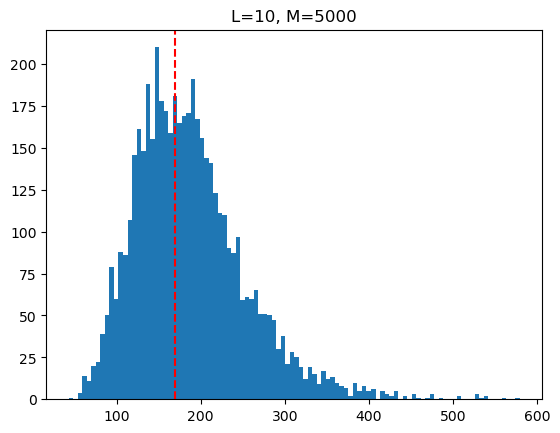

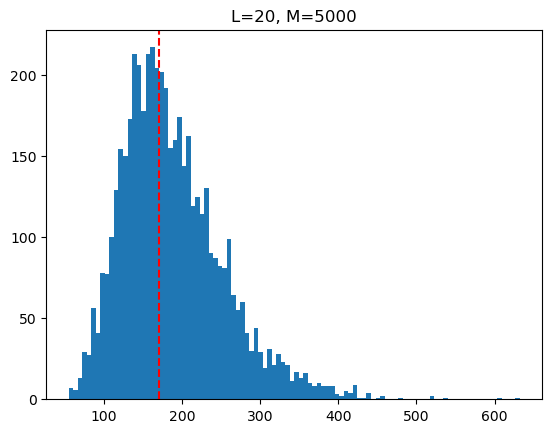

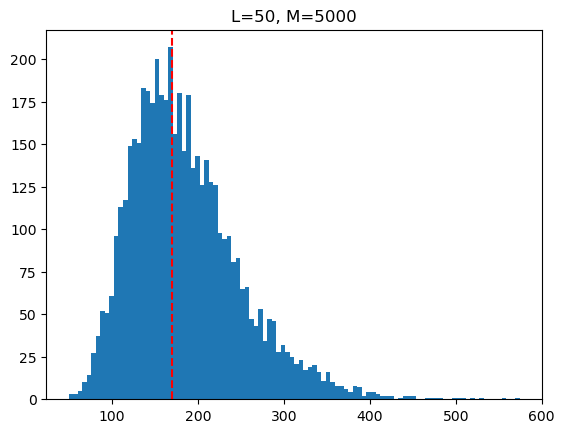

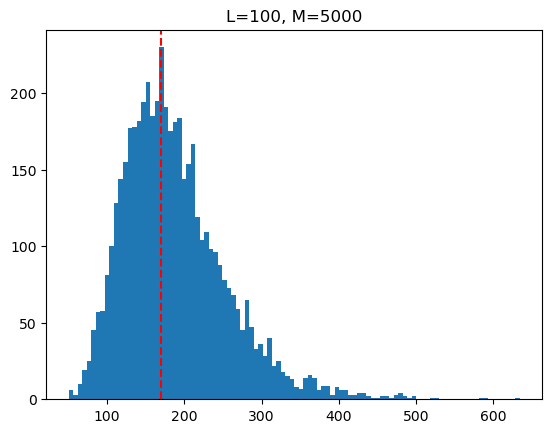

[[403.2485432041527,
  194.39996971523115,
  206.86925524505074,
  253.9753448229377,
  474.13793780377614,
  108.88068606676285,
  146.2090729753263,
  283.3584244365986,
  203.52331326056355,
  189.26750775216485,
  95.42950146044602,
  207.15209557949856,
  250.63111811801554,
  182.54740302138137,
  218.45073142139748,
  149.21803641167992,
  106.8095989231289,
  173.74608418712722,
  169.13396596567222,
  298.39164342066323,
  167.46138101438598,
  442.7342256942575,
  266.01834926539624,
  226.1885566652777,
  253.41924114477905,
  117.91617709377634,
  202.05605663997818,
  119.8701286920877,
  99.10054851232877,
  158.06394063973673,
  270.51666931332363,
  147.37478825107678,
  193.48549812493565,
  430.89049581395744,
  213.47246480113554,
  210.09292435063162,
  180.16192719573465,
  204.89292435996418,
  177.49875343394007,
  257.30391268436307,
  274.87156670263647,
  265.97090391137783,
  177.36339279109524,
  104.94182186416936,
  178.66641248458197,
  219.310885714355,


In [103]:
simulate(S0, mu, sigma, T, L_arr=[10,20,50,100],M=5000, plot=False, hist=True)

### Subtask b)

In [104]:
def cont_time_model(S0, mu, sigma, T, M):
    """
    Simulates the price of a stock using the continuous time model
    :param S0: Initial price
    :param mu: drift
    :param sigma: volatility
    :param T: Time horizon 
    :param M: Number of simulations
    """
    S_T = []
    for x in range (M):
        S_T.append(S0 * np.exp((mu - sigma**2/2)*T + sigma*np.sqrt(T)*np.random.normal(0,1)))
    return S_T



[241.60722589 116.93229999 245.77409052 ... 310.55686582 167.1104178
 289.59106205]


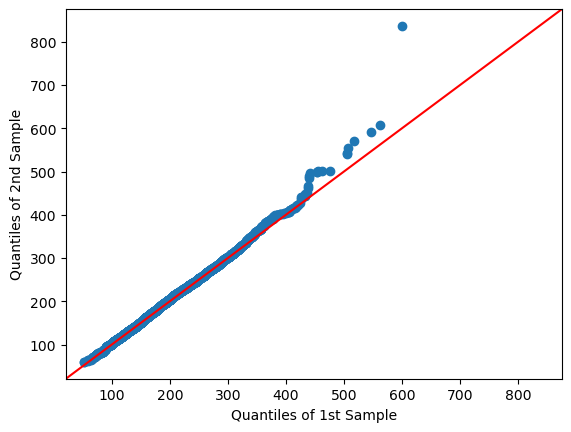

In [105]:
S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=5000, plot=False, hist=False)
S_t_disc = np.array(S_t[0])
print(S_t_disc)
S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=5000))

## qq plot
sm.qqplot_2samples(S_t_cont, S_t_disc, line='45')
plt.show()


In [108]:
for M in [50,500,5000,50000]:
    S_t = simulate(S0, mu, sigma, T, L_arr=[100],M=M, plot=False, hist=False)
    S_t_disc = np.array(S_t[0])
    S_t_cont = np.array(cont_time_model(S0, mu, sigma, T, M=M))
    print(f"M = {M}\n Continuous mean: {S_t_cont.mean()}, var: {S_t_cont.var()}")
    print(f" Discrete mean: {S_t_disc.mean()}, var: {S_t_disc.var()}")

M = 50
 Continuous mean: 192.73067391401045, var: 5012.418480231919
 Discrete mean: 172.50065417997405, var: 3136.8633382585435
M = 500
 Continuous mean: 188.3287155885603, var: 4671.459711053123
 Discrete mean: 186.19920308198348, var: 4586.473367556126
M = 5000
 Continuous mean: 188.26667601890782, var: 4384.573203627896
 Discrete mean: 188.5507162383553, var: 4583.112143423963
M = 50000
 Continuous mean: 188.00640830932636, var: 4417.305767425156
 Discrete mean: 187.90472808092102, var: 4408.442386389731


### Subtask c)

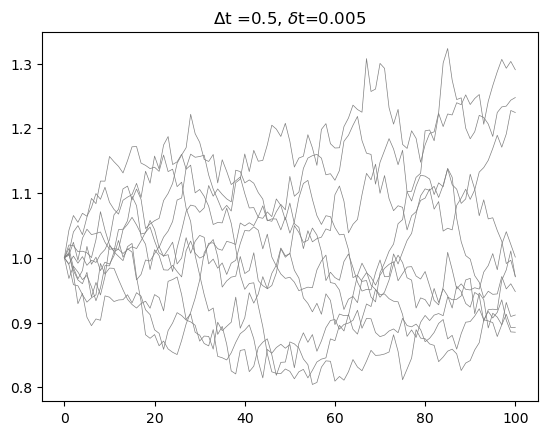

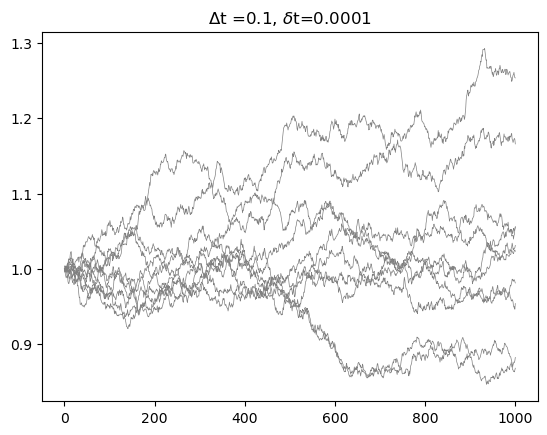

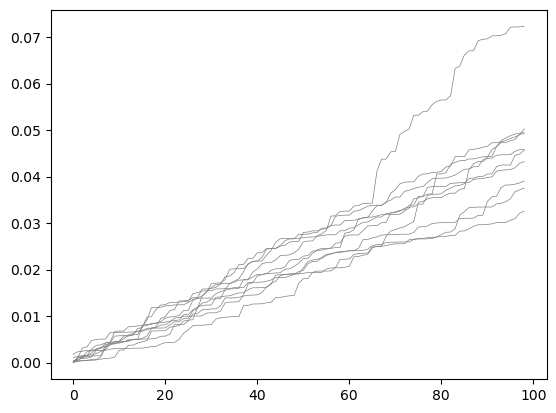

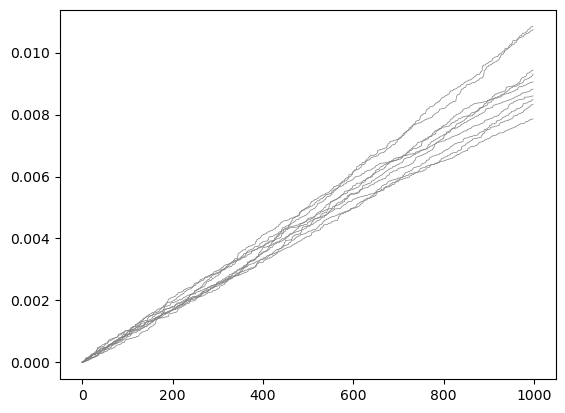

In [107]:
a,b = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[100], T=0.5, M=10,sum_squares=True, plot=True, hist=False)
c,d = simulate(S0=1, mu = 0.05, sigma = 0.3, L_arr=[1000], T=0.1, M=10, sum_squares=True, plot=True, hist=False)
#print(str(b.shape))

for i in range(10):
    plt.plot(np.cumsum(b[i]), color='gray', linewidth=0.5)
plt.show()
for i in range(10):
    plt.plot(np.cumsum(d[i]), color='gray', linewidth=0.5)
plt.show()
#print("_")

## Exercise 4

### Subtask a)